In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')


Importing  Data:

In [3]:
df=pd.read_csv('listings_data.csv')

Understanding  of Data

In [4]:
df.shape

(48895, 16)

In [5]:
df.columns

Index(['listing_id', 'listing_name', 'host_id', 'host_name', 'borough', 'area',
       'latitude', 'longitude', 'room_type', 'price (in dollars)',
       'minimum_stay', 'no_of_reviews', 'last_review_date',
       'reviews_per_month', 'host_listing_count', 'booking_availability'],
      dtype='object')

In [6]:
df.head()

,listing_id,listing_name,host_id,host_name,borough,area,latitude,longitude,room_type,price (in dollars),minimum_stay,no_of_reviews,last_review_date,reviews_per_month,host_listing_count,booking_availability
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


In [7]:
df.dtypes

listing_id                int64
listing_name             object
host_id                   int64
host_name                object
borough                  object
area                     object
latitude                float64
longitude               float64
room_type                object
price (in dollars)        int64
minimum_stay              int64
no_of_reviews             int64
last_review_date         object
reviews_per_month       float64
host_listing_count        int64
booking_availability      int64
dtype: object

In [8]:
df.describe()#describes the whole dataset

,listing_id,host_id,latitude,longitude,price (in dollars),minimum_stay,no_of_reviews,reviews_per_month,host_listing_count,booking_availability
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Data Pre Processing

a.Subsetting the data

In [10]:
df=df[['listing_id', 'listing_name', 'host_id', 'host_name', 'borough', 'area',
         'room_type', 'price (in dollars)',
       'minimum_stay', 'no_of_reviews', 'last_review_date',
       'reviews_per_month', 'host_listing_count', 'booking_availability','latitude','longitude']].copy()
      

In [11]:
df.head()

,listing_id,listing_name,host_id,host_name,borough,area,room_type,price (in dollars),minimum_stay,no_of_reviews,last_review_date,reviews_per_month,host_listing_count,booking_availability,latitude,longitude
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,19-10-2018,0.21,6,365,40.64749,-73.97237
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,21-05-2019,0.38,2,355,40.75362,-73.98377
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,NaN,NaN,1,365,40.80902,-73.94190
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,05-07-2019,4.64,1,194,40.68514,-73.95976
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,19-11-2018,0.10,1,0,40.79851,-73.94399


In [12]:
df.shape

(48895, 16)

In [13]:
df.dtypes

listing_id                int64
listing_name             object
host_id                   int64
host_name                object
borough                  object
area                     object
room_type                object
price (in dollars)        int64
minimum_stay              int64
no_of_reviews             int64
last_review_date         object
reviews_per_month       float64
host_listing_count        int64
booking_availability      int64
latitude                float64
longitude               float64
dtype: object

In [14]:
df['last_review_date']=pd.to_datetime(df['last_review_date'])
df['last_review_date']

C:\Users\choud\AppData\Local\Temp\ipykernel_32840\482120879.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['last_review_date']=pd.to_datetime(df['last_review_date'])


0       2018-10-19
1       2019-05-21
2              NaT
3       2019-07-05
4       2018-11-19
           ...    
48890          NaT
48891          NaT
48892          NaT
48893          NaT
48894          NaT
Name: last_review_date, Length: 48895, dtype: datetime64[ns]

In [15]:
df.dtypes

listing_id                       int64
listing_name                    object
host_id                          int64
host_name                       object
borough                         object
area                            object
room_type                       object
price (in dollars)               int64
minimum_stay                     int64
no_of_reviews                    int64
last_review_date        datetime64[ns]
reviews_per_month              float64
host_listing_count               int64
booking_availability             int64
latitude                       float64
longitude                      float64
dtype: object

In [16]:
df['price (in dollars)'].value_counts()

price (in dollars)
100     2051
150     2047
50      1534
60      1458
200     1401
        ... 
1080       1
1299       1
1295       1
519        1
1978       1
Name: count, Length: 674, dtype: int64

In [17]:
df=df.rename(columns={'listing_id':'Listing_Id', 'listing_name':'Listing_Name', 'host_id':'Host_Id', 'host_name':'Host_Name', 'borough':'Borough', 
                   'area':'Area','room_type':'Room_Type', 'price (in dollars)':'Price(in Dollars)','minimum_stay':'Minimm_Stay', 
                   'no_of_reviews':'No_Of_Reviews', 'last_review_date':'Last_Review_Date','reviews_per_month':'Review_per_Month', 
                   'host_listing_count':'Host_Listing_count', 'booking_availability':'Booking_Availability','latitude':'Latitude','longitude':'Longitude'})

Checking Duplicates Values

In [18]:
df.duplicated().sum()

np.int64(0)

Finding null values

In [19]:
df.isna().sum()

Listing_Id                  0
Listing_Name               16
Host_Id                     0
Host_Name                  21
Borough                     0
Area                        0
Room_Type                   0
Price(in Dollars)           0
Minimm_Stay                 0
No_Of_Reviews               0
Last_Review_Date        10052
Review_per_Month        10052
Host_Listing_count          0
Booking_Availability        0
Latitude                    0
Longitude                   0
dtype: int64

In [20]:
df.head()

,Listing_Id,Listing_Name,Host_Id,Host_Name,Borough,Area,Room_Type,Price(in Dollars),Minimm_Stay,No_Of_Reviews,Last_Review_Date,Review_per_Month,Host_Listing_count,Booking_Availability,Latitude,Longitude
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,2018-10-19,0.21,6,365,40.64749,-73.97237
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,40.75362,-73.98377
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,NaT,NaN,1,365,40.80902,-73.94190
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,40.68514,-73.95976
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,40.79851,-73.94399


Checking the percentage of null values in  a row

In [23]:
def null_percentages(df, columns):
    result={}
    for col in columns:
        if col in df.columns:
            null_count=df[col].isnull().sum()
            total=len(df)
            per=(null_count/total) * 100
            result[col] = round(per,2)
        else:
            result[col]="Column not found"
    return result   

columns={'Listing_Name','Host_Id','Host_Name','Borought','Area',                        
'Room_Type','Price(in Dollars)','Minimm_Stay','No_Of_Reviews',               
'Last_Review_Date','Review_per_Month','Latitude','Longitude'}  
null_percent=null_percentages(df,columns)

for column ,percentage in null_percent.items():
    if isinstance(percentage,float):
        print(f"{column}: {percentage}%")
    else:
        print(f"{column}: {percentage}%")

Borought: Column not found%
Host_Id: 0.0%
Last_Review_Date: 20.56%
Minimm_Stay: 0.0%
Host_Name: 0.04%
Longitude: 0.0%
Listing_Name: 0.03%
No_Of_Reviews: 0.0%
Review_per_Month: 20.56%
Latitude: 0.0%
Price(in Dollars): 0.0%
Room_Type: 0.0%
Area: 0.0%


[Text(0.5, 0, 'Percentage'),
 Text(0, 0.5, 'Data'),
 Text(0.5, 1.0, 'Percentage of Missing Values')]

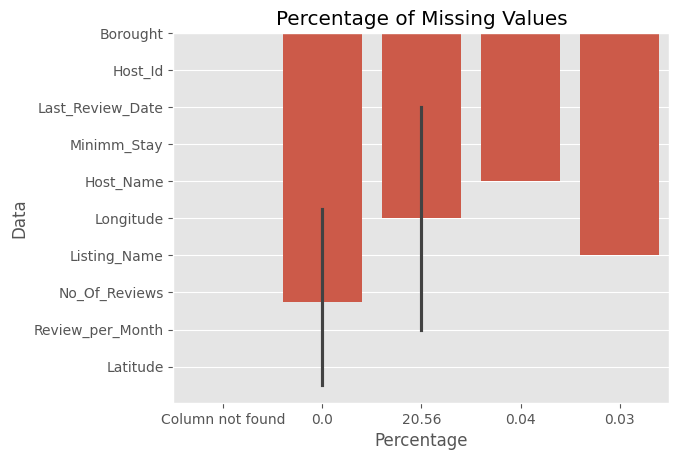

In [27]:
sns.barplot(data=null_percent ,x=null_percent.values(),y=null_percent.keys(),legend=False).set(xlabel="Percentage",ylabel="Data",title="Percentage of Missing Values")

In [28]:
df['Listing_Name'].fillna('Unknown', inplace=True)

C:\Users\choud\AppData\Local\Temp\ipykernel_32840\2616601013.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Listing_Name'].fillna('Unknown', inplace=True)


In [29]:
df['Host_Name'].fillna('Unknown', inplace=True)

C:\Users\choud\AppData\Local\Temp\ipykernel_32840\2937997689.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Host_Name'].fillna('Unknown', inplace=True)


In [30]:
df.isna().sum()

Listing_Id                  0
Listing_Name                0
Host_Id                     0
Host_Name                   0
Borough                     0
Area                        0
Room_Type                   0
Price(in Dollars)           0
Minimm_Stay                 0
No_Of_Reviews               0
Last_Review_Date        10052
Review_per_Month        10052
Host_Listing_count          0
Booking_Availability        0
Latitude                    0
Longitude                   0
dtype: int64

In [31]:
mdi=df['Review_per_Month'].median()
df['Review_per_Month'].fillna(mdi,inplace=True)

C:\Users\choud\AppData\Local\Temp\ipykernel_32840\655170652.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Review_per_Month'].fillna(mdi,inplace=True)


In [32]:
df['Last_Review_Date'].fillna('Not Reviewed',inplace=True)

C:\Users\choud\AppData\Local\Temp\ipykernel_32840\1851055336.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Last_Review_Date'].fillna('Not Reviewed',inplace=True)
C:\Users\choud\AppData\Local\Temp\ipykernel_32840\1851055336.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Not Reviewed' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  df['Last_Review_Date'].fillna('Not Reviewed',inplace

Visualizing the Data

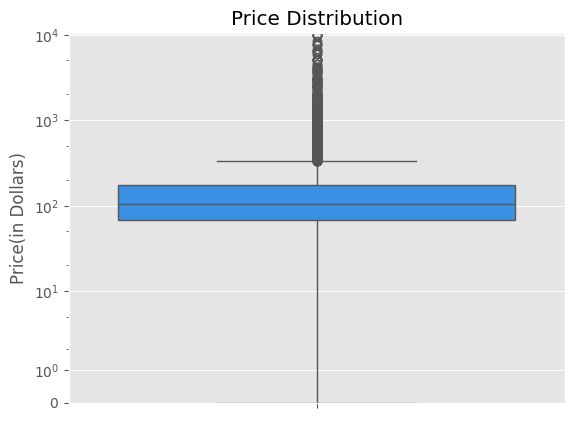

In [47]:
sns.boxplot(data=df, y='Price(in Dollars)', color='dodgerblue').set(title='Price Distribution')
plt.yscale('asinh')
plt.ylim(0)#'linear', 'log', 'symlog', 'asinh', 'logit', 'function', 'functionlog'

plt.show()

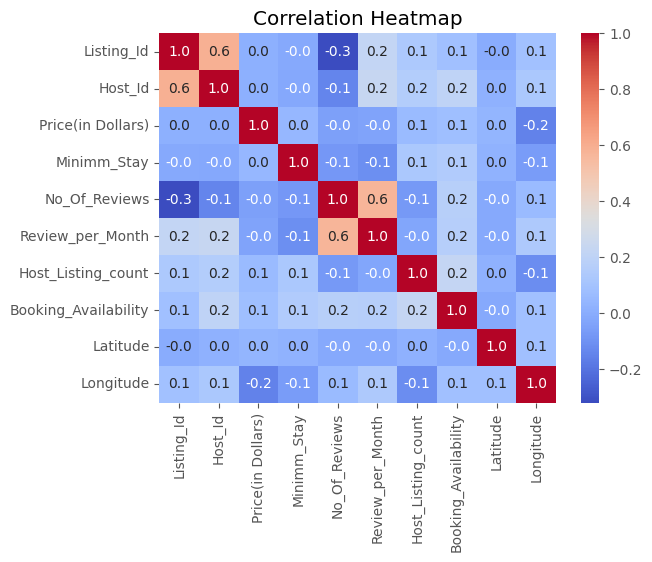

In [85]:
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.1f', cmap='coolwarm').set(title='Correlation Heatmap')
plt.show()

In [84]:
df.columns

Index(['Listing_Id', 'Listing_Name', 'Host_Id', 'Host_Name', 'Borough', 'Area',
       'Room_Type', 'Price(in Dollars)', 'Minimm_Stay', 'No_Of_Reviews',
       'Last_Review_Date', 'Review_per_Month', 'Host_Listing_count',
       'Booking_Availability', 'Latitude', 'Longitude'],
      dtype='object')

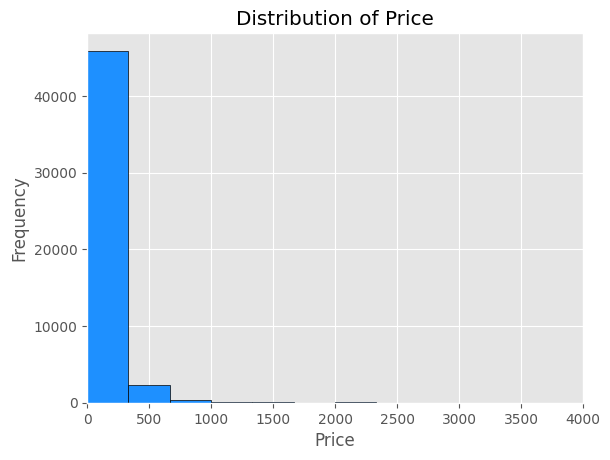

In [72]:
plt.hist(df['Price(in Dollars)'], bins=30, edgecolor='black', color='dodgerblue') # notice how we are binning data here
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.xlim(0,4000)

plt.ylabel('Frequency')
plt.show()

In [60]:


# Assuming 'df' is your DataFrame and 'Price(in Dollars)' is the column of interest
max_value = df['Price(in Dollars)'].max()

print("Maximum value:", max_value)


Maximum value: 10000


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Brooklyn'),
  Text(1, 0, 'Manhattan'),
  Text(2, 0, 'Queens'),
  Text(3, 0, 'Staten Island'),
  Text(4, 0, 'Bronx')])

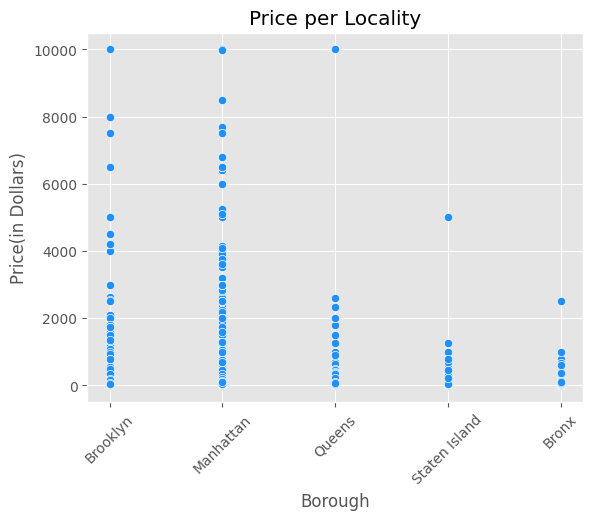

In [59]:
sns.scatterplot(data=df,x='Borough',y='Price(in Dollars)',color='dodgerblue').set(title='Price per Locality')
plt.xticks(rotation=45)

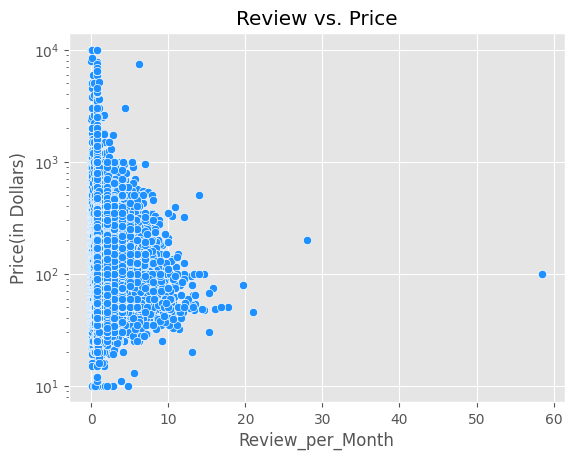

In [83]:
sns.scatterplot(data=df,y='Price(in Dollars)',x='Review_per_Month',color='dodgerblue').set(title="Review vs. Price")
plt.xscale('linear')

plt.yscale('log')

<Axes: xlabel='Borough', ylabel='Minimm_Stay'>

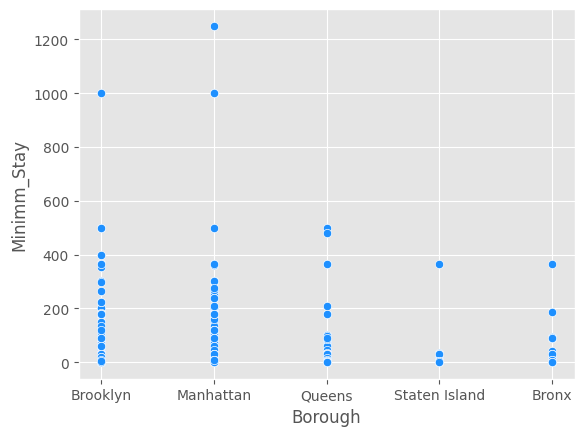

In [86]:
sns.scatterplot(data=df,x="Borough",y='Minimm_Stay',color='dodgerblue')

<Axes: xlabel='Room_Type', ylabel='Price(in Dollars)'>

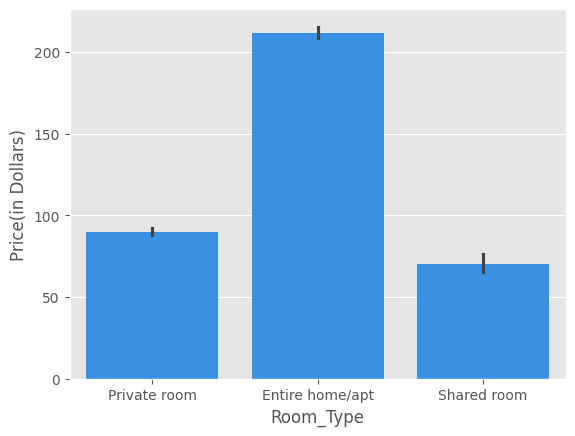

In [87]:
sns.barplot(data=df,x='Room_Type',y='Price(in Dollars)',color='dodgerblue')

<Axes: xlabel='Price(in Dollars)', ylabel='Booking_Availability'>

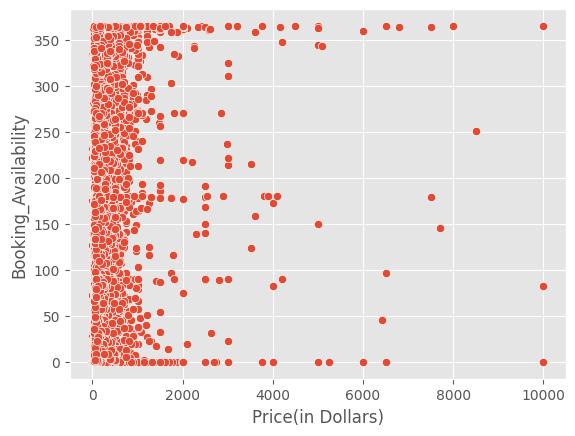

In [88]:
sns.scatterplot(data=df,x='Price(in Dollars)',y='Booking_Availability')

<Axes: xlabel='Room_Type', ylabel='Minimm_Stay'>

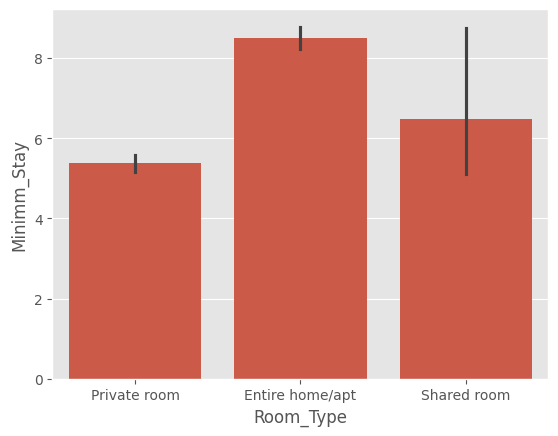

In [89]:
sns.barplot(data=df,x='Room_Type',y='Minimm_Stay')

In [90]:
df.to_csv('new_procssed_data.csv')